## Training and Testing Models for Lead Scoring

#### - Import and Clean Data
###  - Convert Categorical Values to Numeric
###  - Exploratory Data Analysis
###  - Model Testing and Evaluation

In [176]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


## Import Data and Remove Irrelevant Features

In [256]:
path = "C:\\Users\\HannahNevel\\Downloads\\archive\\Lead Scoring.csv"
lead_data = pd.read_csv(path, delimiter=",")
lead_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [257]:
lead_data.drop(columns =['What matters most to you in choosing a course', 'Magazine','Newspaper Article','X Education Forums','Newspaper',\
    'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Asymmetrique Activity Index',\
        'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Search', 'Lead Profile'\
            ,'Country', 'City', 'How did you hear about X Education'], inplace = True)


In [258]:
lead_data.rename(columns = {'Total Time Spent on Website':'Total Time Spent on Website (min)'}, inplace = True)
lead_data['Total Time Spent on Website (min)'] = lead_data['Total Time Spent on Website (min)'].div(60)
lead_data.drop_duplicates(subset=None, inplace=True)


In [259]:
lead_data.interpolate(method ='linear', limit_direction ='forward', inplace =True)
lead_data.replace('Select', np.nan, inplace=True)

In [260]:
lead_data.fillna(method='bfill', inplace = True)

In [261]:
print(lead_data.isnull().sum())
#percent null values by column
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                          0
Lead Number                          0
Lead Origin                          0
Lead Source                          0
Do Not Email                         0
Do Not Call                          0
Converted                            0
TotalVisits                          0
Total Time Spent on Website (min)    0
Page Views Per Visit                 0
Last Activity                        0
Specialization                       0
What is your current occupation      0
Tags                                 0
Lead Quality                         0
Last Notable Activity                0
dtype: int64


Prospect ID                          0.0
Lead Number                          0.0
Lead Origin                          0.0
Lead Source                          0.0
Do Not Email                         0.0
Do Not Call                          0.0
Converted                            0.0
TotalVisits                          0.0
Total Time Spent on Website (min)    0.0
Page Views Per Visit                 0.0
Last Activity                        0.0
Specialization                       0.0
What is your current occupation      0.0
Tags                                 0.0
Lead Quality                         0.0
Last Notable Activity                0.0
dtype: float64

## Encode Categorical Variables to Numerical for Modeling 

In [184]:
from sklearn.model_selection import train_test_split

In [227]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)



In [188]:
lead_data.dtypes

Prospect ID                           object
Lead Number                            int64
Lead Origin                           object
Lead Source                           object
Do Not Email                          object
Do Not Call                           object
Converted                              int64
TotalVisits                          float64
Total Time Spent on Website (min)    float64
Page Views Per Visit                 float64
Last Activity                         object
What is your current occupation       object
Last Notable Activity                 object
dtype: object

In [262]:
encoded_lead_data = MultiColumnLabelEncoder(columns = ['Lead Origin','Lead Source','Do Not Email', 'Do Not Call','Last Activity',\
    'What is your current occupation','Last Notable Activity','Specialization', 'Tags','Lead Quality']).fit_transform(lead_data)

## Exploratory Data Analysis

In [263]:
encoded_lead_data.corr()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website (min),Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
Lead Number,1.000000,0.004194,0.081152,-0.098529,0.011913,0.025157,0.019974,0.020329,0.054849,-0.094307,-0.001824,0.011581,0.066960,-0.147648,-0.140084
Lead Origin,0.004194,1.000000,0.052633,0.053296,0.006909,0.223725,0.073335,0.088852,0.136418,0.043373,-0.028117,0.082760,0.033670,-0.101421,0.049143
Lead Source,0.081152,0.052633,1.000000,-0.056631,0.010973,0.173315,-0.145412,-0.233393,-0.238829,0.071174,0.014497,0.043313,-0.004312,-0.137600,0.042267
Do Not Email,-0.098529,0.053296,-0.056631,1.000000,-0.004322,-0.135580,0.034758,-0.046374,0.035778,-0.031024,0.019744,-0.033668,-0.004860,0.085146,0.092492
Do Not Call,0.011913,0.006909,0.010973,-0.004322,1.000000,0.018581,0.003252,0.006801,-0.005831,-0.002829,-0.000731,-0.002025,-0.005240,0.005004,0.001432
Converted,0.025157,0.223725,0.173315,-0.135580,0.018581,1.000000,0.030367,0.362483,-0.003149,0.231904,-0.007990,0.174871,0.186751,-0.297144,0.210445
TotalVisits,0.019974,0.073335,-0.145412,0.034758,0.003252,0.030367,1.000000,0.217446,0.513868,0.058390,0.017536,-0.000485,0.024335,0.000005,0.005216
Total Time Spent on Website (min),0.020329,0.088852,-0.233393,-0.046374,0.006801,0.362483,0.217446,1.000000,0.313975,0.064710,0.007159,0.057017,0.085038,-0.096355,0.071844
Page Views Per Visit,0.054849,0.136418,-0.238829,0.035778,-0.005831,-0.003149,0.513868,0.313975,1.000000,0.060470,0.010715,0.000399,0.069001,0.012550,0.002617
Last Activity,-0.094307,0.043373,0.071174,-0.031024,-0.002829,0.231904,0.058390,0.064710,0.060470,1.000000,-0.007190,0.070015,0.157705,0.002628,0.744346


In [330]:
lead_data['Lead Source'].mode()

0    Google
dtype: object

In [ ]:
import matplotlib.pyplot as plt

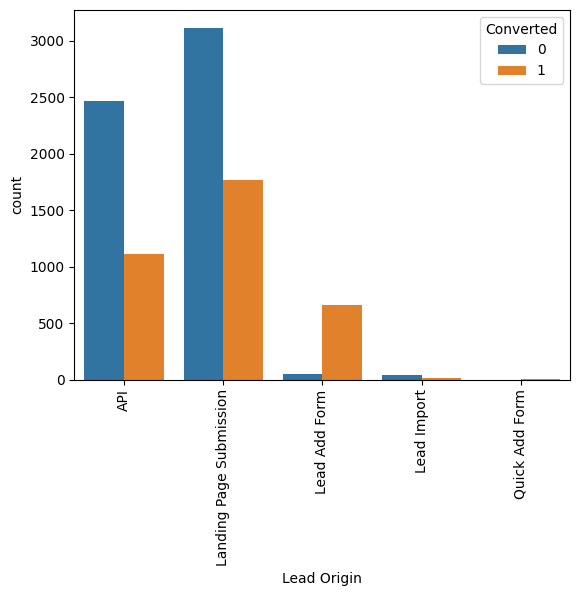

In [264]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)

plt.xticks(rotation = 90)
plt.show()

Text(0, 0.5, 'Conversion Rate')

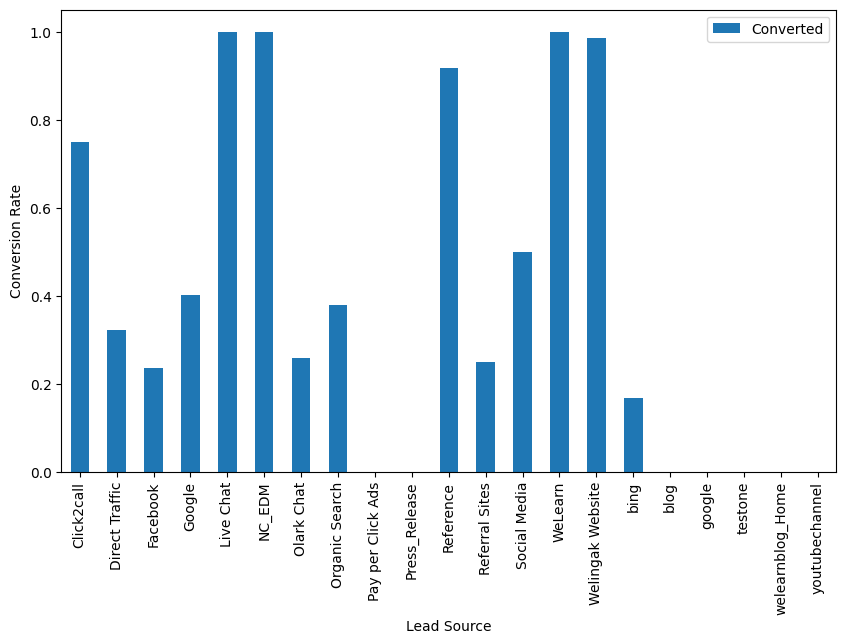

In [265]:
LeadSource_group = lead_data[['Lead Source','Converted']]
LeadSource_group = LeadSource_group.groupby(['Lead Source'],as_index=False).mean()

LeadSource_group.plot(kind='bar', x = 'Lead Source', figsize=(10, 6))

plt.xlabel('Lead Source')
plt.ylabel('Conversion Rate') 

<AxesSubplot:xlabel='Total Time Spent on Website (min)', ylabel='Last Activity'>

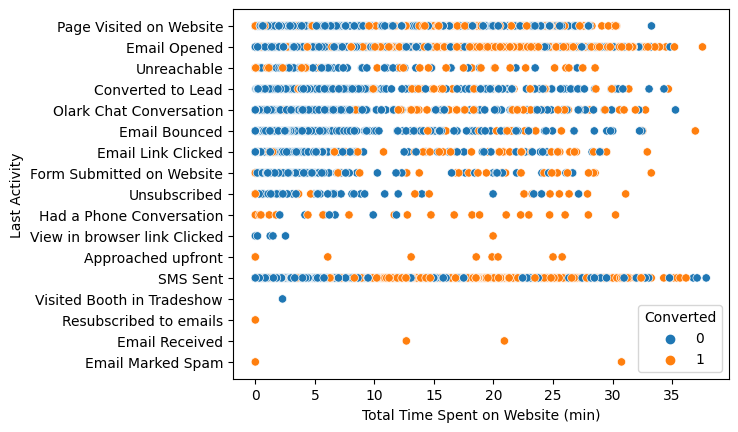

In [266]:
sns.scatterplot(data=lead_data, y='Last Activity',x='Total Time Spent on Website (min)',hue='Converted')

## Model Training and Testing

In [295]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Converted', 'Converted']); ax.yaxis.set_ticklabels(['Not Converted', 'Converted']) 
    plt.show() 

In [267]:
Y = lead_data['Converted'].to_numpy()
Y

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [268]:
X = encoded_lead_data[['Lead Origin', 'Lead Source','Last Activity', 'Total Time Spent on Website (min)','What is your current occupation', 'Last Notable Activity',\
    'Do Not Email', 'Do Not Call','TotalVisits','Page Views Per Visit','Specialization','Tags','Lead Quality']]
Xcols = X.columns

In [269]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [299]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.15, random_state=2)

In [300]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10).fit(X_train, Y_train)

In [301]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.79449814427643


In [302]:
logreg_cv.score(X_test, Y_test)

0.7842712842712842

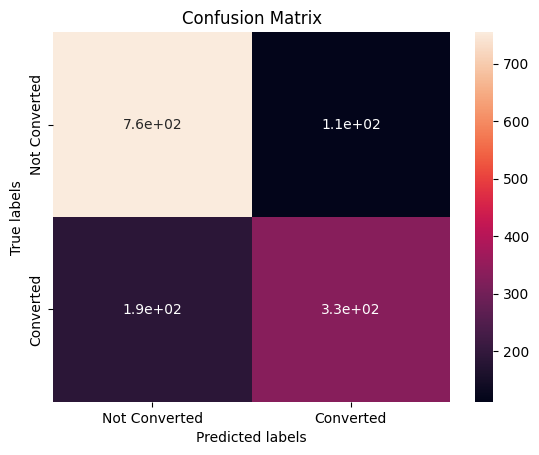

In [303]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [304]:
import warnings
warnings.filterwarnings('ignore')

In [305]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [306]:
tree_cv = GridSearchCV(tree, parameters, cv =10).fit(X_train, Y_train)

In [307]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8540846987893227


In [308]:
tree_cv.score(X_test, Y_test)

0.8564213564213564

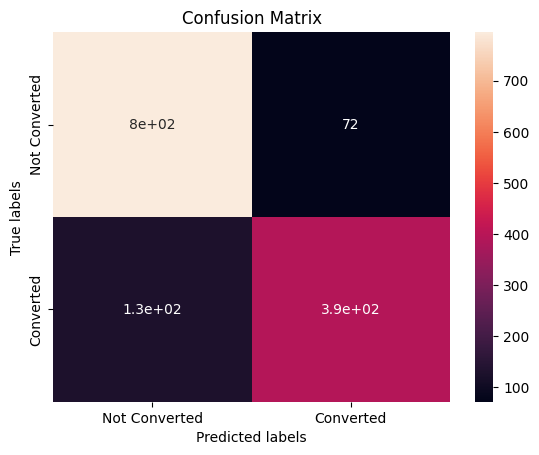

In [309]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [310]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [311]:
y_pred = rf.predict(X_test)

In [312]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8556998556998557


In [313]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021FF88E8280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021FFAD4CCD0>})

In [314]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 392}


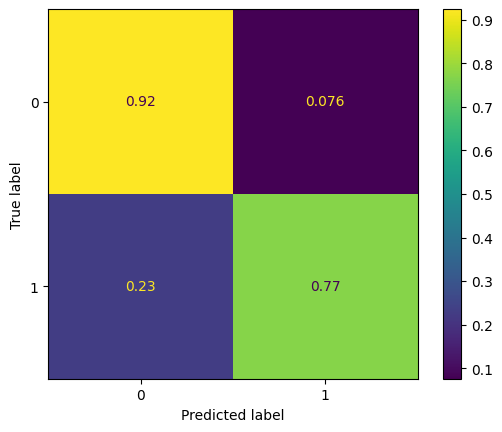

In [315]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

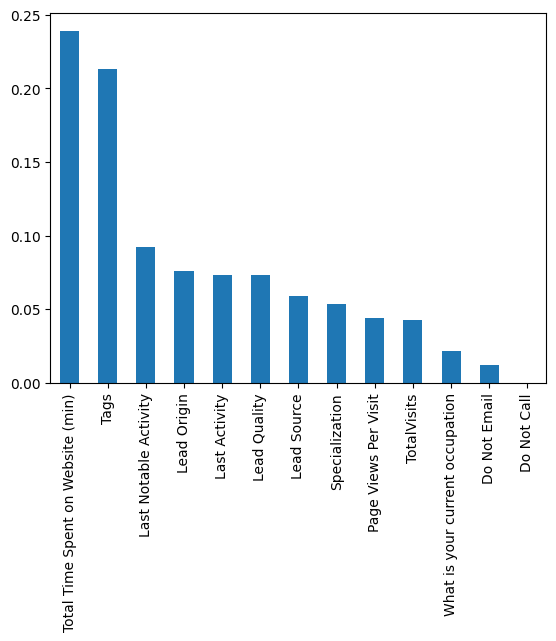

In [316]:
feature_importances = pd.Series(best_rf.feature_importances_, index=Xcols).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [321]:

# Create a random forest classifier
rf2= RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'], max_depth= rand_search.best_params_['max_depth'])


rf2.fit(X_train, Y_train)

RandomForestClassifier(max_depth=14, n_estimators=392)

In [322]:
y_pred2 = rf2.predict(X_test)

In [323]:
accuracy = accuracy_score(Y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.8643578643578643


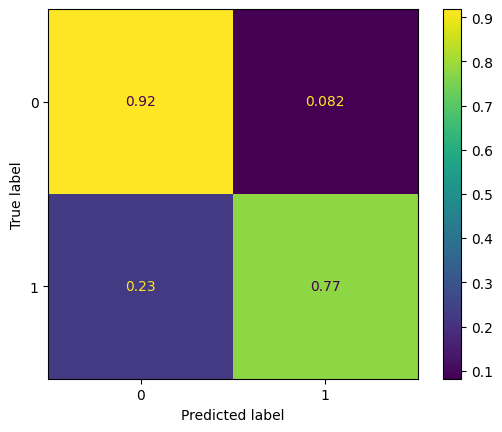

In [324]:
cm2 = confusion_matrix(Y_test, y_pred2)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

ConfusionMatrixDisplay(confusion_matrix=cm2).plot();

In [325]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       867
           1       0.85      0.77      0.81       519

    accuracy                           0.86      1386
   macro avg       0.86      0.85      0.85      1386
weighted avg       0.86      0.86      0.86      1386

